In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:\\Users\\libin_urv2w13\\Desktop\\mljourney\\Unsupervised-ML\\Country-data.xls")

In [3]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [4]:
df[df.duplicated].shape 

(0, 10)

In [5]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp '],
      dtype='object')

In [6]:
x=df[["child_mort","health","life_expec","gdpp ","total_fer","income"]]
x.head() 

,child_mort,health,life_expec,gdpp,total_fer,income
0,90.2,7.58,56.2,553,5.82,1610
1,16.6,6.55,76.3,4090,1.65,9930
2,27.3,4.17,76.5,4460,2.89,12900
3,119.0,2.85,60.1,3530,6.16,5900
4,10.3,6.03,76.8,12200,2.13,19100


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)

In [8]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(random_state=42,n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_)
print(wcss) 

[34.876855597079626, 18.43296476047564, 12.000541582641551, 10.499276989979057, 8.757088798174593, 8.046930948822164, 7.189277967659602, 7.61718800679073, 6.202566549685923, 5.577272154462998]


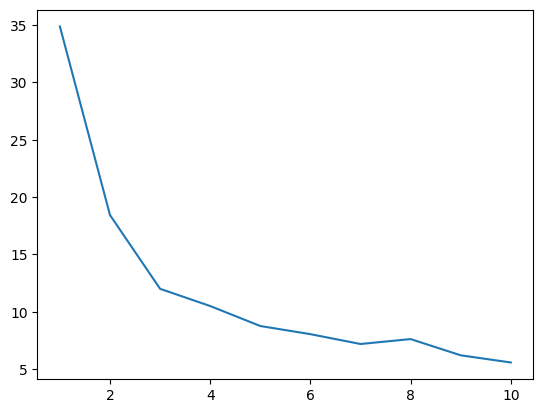

In [9]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),wcss)

In [10]:
from sklearn.cluster import KMeans
km=KMeans(random_state=42,n_clusters=3)
y=km.fit_predict(x)
y

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0], dtype=int32)

In [11]:
df["cluster"]=y

In [12]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [13]:
df["cluster"].value_counts()

cluster
2    88
0    46
1    33
Name: count, dtype: int64

In [14]:
from sklearn.metrics import silhouette_score
print("silhouette_score : ",silhouette_score(x,y)) 
#this score value is bad 

silhouette_score :  0.424379158853005
